<a href="https://colab.research.google.com/github/jorgegonzaleza/EjerciciosMachineLearning/blob/main/PrediccionCosteTraspaso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PREDICCIÓN COSTE TRASPASO JUGADORES

## 1. IMPORTAMOS LIBRERÍAS Y LEEMOS EL CSV

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [122]:

import os


BASE = "https://raw.githubusercontent.com/jorgegonzaleza/EjerciciosMachineLearning/main/"
FILES = {
"transfers.csv": "transfers.csv",
}


# Descarga silenciosa
for src, dst in FILES.items():
  os.system(f"wget -q {BASE}{src} -O {dst}")


# Carga de dataframes (ajusta si tu notebook solo usa uno de ellos)
df = pd.read_csv("transfers.csv")


print("✓ CSV descargados y cargados en dataframes: df")
print("df_transfer:", df.shape)

✓ CSV descargados y cargados en dataframes: df
df_transfer: (79646, 10)


In [123]:
df.head(10)

,player_id,transfer_date,transfer_season,from_club_id,to_club_id,from_club_name,to_club_name,transfer_fee,market_value_in_eur,player_name
0,16136,2026-07-01,26/27,417,123,OGC Nice,Retired,NaN,500000.0,Dante
1,1138758,2026-07-01,26/27,336,631,Sporting CP,Chelsea,52140000.0,45000000.0,Geovany Quenda
2,195778,2026-06-30,25/26,79,27,VfB Stuttgart,Bayern Munich,0.0,12000000.0,Alexander Nübel
3,569033,2026-06-30,25/26,39,27,1.FSV Mainz 05,Bayern Munich,0.0,4000000.0,Armindo Sieb
4,626913,2026-06-30,25/26,398,380,Lazio,Salernitana,0.0,15000000.0,Boulaye Dia
5,743395,2026-06-30,25/26,9010,15,FCV Dender EH,B. Leverkusen,0.0,1500000.0,Noah Mbamba
6,887834,2026-06-30,25/26,979,1023,Moreirense,Palmeiras,0.0,1000000.0,Michel
7,1047109,2026-06-30,25/26,2672,265,APO Levadiakos,Panathinaikos,0.0,300000.0,Georgios Katris
8,128223,2026-01-20,25/26,141,5,Galatasaray,AC Milan,0.0,13000000.0,Álvaro Morata
9,955213,2026-01-01,25/26,10690,36949,Zorya Lugansk,Dynamo Kyiv U19,0.0,50000.0,Andriy Matkevych


### Información de la base de datos

In [124]:
#VEMOS SI HAY VALORES NULOS
df.isna().any()

,0
player_id,False
transfer_date,False
transfer_season,False
from_club_id,False
to_club_id,False
from_club_name,False
to_club_name,False
transfer_fee,True
market_value_in_eur,True
player_name,False


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79646 entries, 0 to 79645
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_id            79646 non-null  int64  
 1   transfer_date        79646 non-null  object 
 2   transfer_season      79646 non-null  object 
 3   from_club_id         79646 non-null  int64  
 4   to_club_id           79646 non-null  int64  
 5   from_club_name       79646 non-null  object 
 6   to_club_name         79646 non-null  object 
 7   transfer_fee         51931 non-null  float64
 8   market_value_in_eur  49330 non-null  float64
 9   player_name          79646 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 6.1+ MB


In [126]:
df.describe

<bound method NDFrame.describe of        player_id transfer_date transfer_season  from_club_id  to_club_id  \
0          16136    2026-07-01           26/27           417         123   
1        1138758    2026-07-01           26/27           336         631   
2         195778    2026-06-30           25/26            79          27   
3         569033    2026-06-30           25/26            39          27   
4         626913    2026-06-30           25/26           398         380   
...          ...           ...             ...           ...         ...   
79641      35207    1995-07-01           95/96         42281       11896   
79642      22141    1994-07-01           94/95         59178       29463   
79643      33829    1994-07-01           94/95         58405       53957   
79644      40680    1994-07-01           94/95         47320       47318   
79645      61989    1993-07-01           93/94         55345       55343   

        from_club_name     to_club_name  transfer_fee  market_value_in_eur  \
0             OGC Nice          Retired           NaN             500000.0   
1          Sporting CP          Chelsea    52140000.0           45000000.0   
2        VfB Stuttgart    Bayern Munich           0.0           12000000.0   
3       1.FSV Mainz 05    Bayern Munich           0.0            4000000.0   
4                Lazio      Salernitana           0.0           15000000.0   
...                ...              ...           ...                  ...   
79641  PTSV Dort. Yth.    Dortmund Yth.           0.0                  NaN   
79642    Castellammare   Sorrento Youth           NaN                  NaN   
79643  FC Penafiel You    Sporting Yth.           NaN                  NaN   
79644   Lichtenw. Yth.  Schornbach Yth.           0.0                  NaN   
79645   A. Ickern Yth.  VfR Rauxel Yth.           0.0                  NaN   

           player_name  
0                Dante  
1       Geovany Quenda  
2      Alexander Nübel  
3         Armindo Sieb  
4          Boulaye Dia  
...                ...  
79641       Marco Reus  
79642  Antonio Mirante  
79643       José Fonte  
79644     Sven Ulreich  
79645    Michael Esser  

[79646 rows x 10 columns]>

## 2. AJUSTES BASE DE DATOS

### Hacemos una copia del original para no modificarlo

In [127]:
df_clean=df.copy()

### Eliminación de filas con: valores nulos en traspasos, retiradas o agentes libre

In [128]:
#BUSCAMOS EL VALOR ASOCIADO AL CLUB "RETIRADO"" PARA ELIMINARLO
df.query("to_club_id <= 123 and to_club_id >= 123")

,player_id,transfer_date,transfer_season,from_club_id,to_club_id,from_club_name,to_club_name,transfer_fee,market_value_in_eur,player_name
0,16136,2026-07-01,26/27,417,123,OGC Nice,Retired,NaN,500000.0,Dante
24,31067,2025-07-01,25/26,468,123,Sparta R.,Retired,NaN,100000.0,Jonathan de Guzmán
25,34784,2025-07-01,25/26,467,123,NEC Nijmegen,Retired,NaN,100000.0,Lasse Schöne
26,39728,2025-07-01,25/26,12,123,AS Roma,Retired,NaN,2500000.0,Mats Hummels
27,42710,2025-07-01,25/26,1096,123,Royal Antwerp,Retired,NaN,2200000.0,Toby Alderweireld
...,...,...,...,...,...,...,...,...,...,...
9414,204144,2024-01-09,23/24,5724,123,Randers FC,Retired,NaN,150000.0,Alexander Nybo
9645,91727,2024-01-01,23/24,53646,123,Polissya,Retired,NaN,50000.0,Andriy Gitchenko
9655,181469,2024-01-01,23/24,3385,123,Panserraikos,Retired,NaN,200000.0,Tomas Hajek
9991,69683,2023-11-21,23/24,3999,123,PAS Lamia,Retired,NaN,700000.0,Alan Dzagoev


In [129]:
#ELIMINAMOS LOS TRANSPASOS QUE SON RETIRADAS
df_clean=df_clean[df_clean["to_club_id"]!=123]

In [130]:
#BUSCAMOS EL VALOR ASOCIADO AL CLUB "SIN EQUIPO"" PARA ELIMINARLO
df.query("to_club_id <= 515 and to_club_id >= 515")

,player_id,transfer_date,transfer_season,from_club_id,to_club_id,from_club_name,to_club_name,transfer_fee,market_value_in_eur,player_name
21,58358,2025-08-01,25/26,27,515,Bayern Munich,Without Club,NaN,6000000.0,Thomas Müller
29,44996,2025-07-01,25/26,36,515,Fenerbahce,Without Club,NaN,100000.0,Serdar Aziz
30,55508,2025-07-01,25/26,269,515,Holstein Kiel,Without Club,NaN,500000.0,Lewis Holtby
31,57796,2025-07-01,24/25,2036,515,Heidenheim,Without Club,NaN,250000.0,Vitus Eicher
32,58995,2025-07-01,25/26,86,515,Werder Bremen,Without Club,NaN,1000000.0,Anthony Jung
...,...,...,...,...,...,...,...,...,...,...
77436,255353,2008-07-01,08/09,14651,515,Brist. Rov. U18,Without Club,NaN,NaN,Christian Doidge
77556,91845,2008-05-01,08/09,88015,515,FC Seoul U18,Without Club,NaN,NaN,Heung-min Son
77610,52403,2008-01-01,07/08,128,515,Skoda Xanthi,Without Club,NaN,400000.0,Dimitrios Siovas
77658,98067,2008-01-01,07/08,31030,515,Hamilton A. U17,Without Club,NaN,NaN,Zander Clark


In [131]:
#ELIMINAMOS LOS TRANSPASOS QUE SON SIN EQUIPO(NO SON TRASPASOS)
df_clean=df_clean[df_clean["to_club_id"]!=515]

In [132]:
#ELIMINAMOS FILAS QUE NO TIENEN LA CANTIDAD DE TRASPASO
df_clean=df_clean[df_clean["transfer_fee"].notna()]

### Eliminación Características

In [133]:
#ELIMINAMOS ATRIBUTOS DUPLICADOS Y TRANSFER_DATE, AUNQUE PODRÍA SER INTERESANTE
del df_clean["from_club_name"]
del df_clean["to_club_name"]
del df_clean["player_name"]
del df_clean["transfer_date"]


### Conversión de características a numérico

In [134]:
#CONVERTIMOS CATEGÓRICO A NUMÉRICO
df_clean=pd.get_dummies(df_clean,dtype='int')

In [135]:
df_clean

,player_id,from_club_id,to_club_id,transfer_fee,market_value_in_eur,transfer_season_00/01,transfer_season_01/02,transfer_season_02/03,transfer_season_03/04,transfer_season_04/05,...,transfer_season_24/25,transfer_season_25/26,transfer_season_26/27,transfer_season_93/94,transfer_season_94/95,transfer_season_95/96,transfer_season_96/97,transfer_season_97/98,transfer_season_98/99,transfer_season_99/00
1,1138758,336,631,52140000.0,45000000.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,195778,79,27,0.0,12000000.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,569033,39,27,0.0,4000000.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,626913,398,380,0.0,15000000.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,743395,9010,15,0.0,1500000.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79637,61989,55343,55341,0.0,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
79640,68864,79611,32804,0.0,NaN,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
79641,35207,42281,11896,0.0,NaN,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
79644,40680,47320,47318,0.0,NaN,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [136]:
#EXPRESAMOS TRANSFER_FEE,MARKET_VALUE_IN_EUR EN MILLONES
df_clean["transfer_fee"]=df_clean["transfer_fee"]/1000000
df_clean["market_value_in_eur"]=df_clean["market_value_in_eur"]/1000000

In [137]:
df_clean

,player_id,from_club_id,to_club_id,transfer_fee,market_value_in_eur,transfer_season_00/01,transfer_season_01/02,transfer_season_02/03,transfer_season_03/04,transfer_season_04/05,...,transfer_season_24/25,transfer_season_25/26,transfer_season_26/27,transfer_season_93/94,transfer_season_94/95,transfer_season_95/96,transfer_season_96/97,transfer_season_97/98,transfer_season_98/99,transfer_season_99/00
1,1138758,336,631,52.14,45.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,195778,79,27,0.00,12.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,569033,39,27,0.00,4.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,626913,398,380,0.00,15.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,743395,9010,15,0.00,1.5,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79637,61989,55343,55341,0.00,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
79640,68864,79611,32804,0.00,NaN,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
79641,35207,42281,11896,0.00,NaN,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
79644,40680,47320,47318,0.00,NaN,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [138]:
#VEMOS YA QUE TODAS LAS CATEGORIAS SON  NUMERICAS
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51921 entries, 1 to 79645
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   player_id              51921 non-null  int64  
 1   from_club_id           51921 non-null  int64  
 2   to_club_id             51921 non-null  int64  
 3   transfer_fee           51921 non-null  float64
 4   market_value_in_eur    41033 non-null  float64
 5   transfer_season_00/01  51921 non-null  int64  
 6   transfer_season_01/02  51921 non-null  int64  
 7   transfer_season_02/03  51921 non-null  int64  
 8   transfer_season_03/04  51921 non-null  int64  
 9   transfer_season_04/05  51921 non-null  int64  
 10  transfer_season_05/06  51921 non-null  int64  
 11  transfer_season_06/07  51921 non-null  int64  
 12  transfer_season_07/08  51921 non-null  int64  
 13  transfer_season_08/09  51921 non-null  int64  
 14  transfer_season_09/10  51921 non-null  int64  
 15  transfe

### Completamos valores nulos con

In [139]:
#VEMOS ANALISIS DE CATEGORIAS
#df_clean.describe()

In [140]:
#mediana_market_value=df_clean["market_value_in_eur"].median()

In [141]:
#df_clean["market_value_in_eur"]=df_clean["market_value_in_eur"].fillna(mediana_market_value)

In [142]:
#df_clean

In [143]:
#ELIMINAMOS FILAS QUE NO TIENEN LA CANTIDAD DE TRASPASO
df_clean=df_clean[df_clean["market_value_in_eur"].notna()]

In [144]:
df_clean

,player_id,from_club_id,to_club_id,transfer_fee,market_value_in_eur,transfer_season_00/01,transfer_season_01/02,transfer_season_02/03,transfer_season_03/04,transfer_season_04/05,...,transfer_season_24/25,transfer_season_25/26,transfer_season_26/27,transfer_season_93/94,transfer_season_94/95,transfer_season_95/96,transfer_season_96/97,transfer_season_97/98,transfer_season_98/99,transfer_season_99/00
1,1138758,336,631,52.14,45.00,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,195778,79,27,0.00,12.00,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,569033,39,27,0.00,4.00,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,626913,398,380,0.00,15.00,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,743395,9010,15,0.00,1.50,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79055,29391,3034,371,0.00,0.05,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
79062,19041,5299,116,0.00,0.05,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
79063,14555,399,31,1.40,0.75,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
79066,12029,1049,7971,0.00,1.75,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## 3. Correlación entre características

In [145]:
# Mostrar la correlación entre los atributos del conjunto de datos
corr_matrix = df_clean.corr()
corr_matrix["transfer_fee"].sort_values(ascending=False)

,transfer_fee
transfer_fee,1.000000
market_value_in_eur,0.673571
transfer_season_26/27,0.042631
transfer_season_19/20,0.025939
transfer_season_24/25,0.023190
transfer_season_25/26,0.022662
transfer_season_17/18,0.014196
transfer_season_18/19,0.005184
transfer_season_16/17,0.001747
transfer_season_23/24,0.000455


## 4. Predicción con regresión lineal simple a partir del market value

## Particionado del conjunto de datos y aplicación del modelo

In [146]:
from sklearn.model_selection import train_test_split
# Construcción de una función que realice el particionado completo
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [147]:
#NOS QUEDAMOS CON LOS JUGADORES MÁS VALIOSOS
df_reg=df_clean[["transfer_fee","market_value_in_eur"]]
df_reg=df_reg[df_reg["transfer_fee"]>=25]
df_reg=df_reg[df_reg["market_value_in_eur"]>=25]

train_set, val_set, test_set = train_val_test_split(df_reg)

In [148]:
df_reg

,transfer_fee,market_value_in_eur
1,52.14,45.0
46,25.00,25.0
69,28.10,28.0
1199,32.00,37.0
1396,50.00,80.0
...,...,...
74179,37.00,30.0
74524,29.50,26.0
77770,30.00,30.0
77776,25.50,25.0


In [149]:
X_train_set=train_set.drop("transfer_fee",axis=1)
y_train_set=train_set["transfer_fee"]
X_val_set=val_set.drop("transfer_fee",axis=1)
y_val_set=val_set["transfer_fee"]
X_test_set=test_set.drop("transfer_fee",axis=1)
y_test_set=test_set["transfer_fee"]

In [150]:
y_train_set.describe()

,transfer_fee
count,211.000000
mean,46.334692
std,19.580049
min,25.000000
25%,31.450000
50%,42.000000
75%,55.000000
max,135.000000


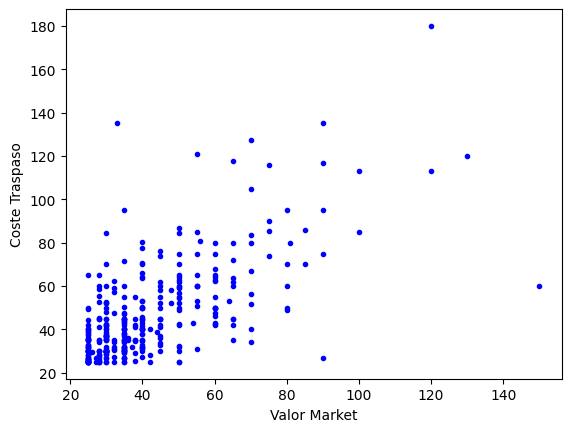

In [151]:
# Representación gráfica del conjunto de datos
plt.plot(df_reg['market_value_in_eur'], df_reg['transfer_fee'], "b.")
plt.xlabel("Valor Market")
plt.ylabel("Coste Traspaso")
plt.show()

In [152]:
from sklearn.linear_model import LinearRegression
# Construcción del modelo y ajuste de la función hipótesis
lin_reg = LinearRegression()
lin_reg.fit(df_reg['market_value_in_eur'].values.reshape(-1, 1), df_reg['transfer_fee'].values)

LinearRegression()

In [153]:
# Predicción para el valor mínimo y máximo del conjunto de datos de entrenamiento
X_min_max = np.array([[df_reg["market_value_in_eur"].min()], [df_reg["market_value_in_eur"].max()]])
print(X_min_max)
y_train_pred = lin_reg.predict(X_min_max)
print(y_train_pred)

[[ 25.]
 [150.]]
[ 33.35292349 132.32159503]


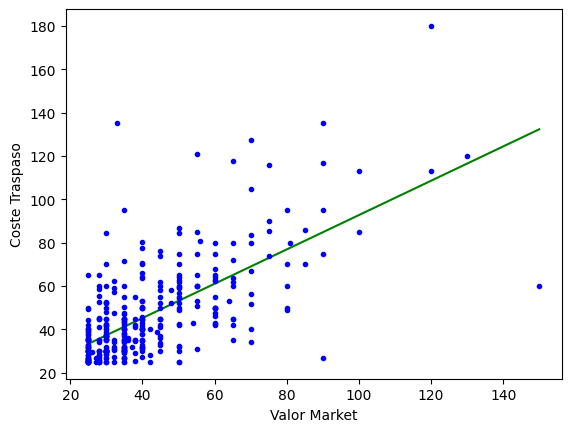

In [154]:
# Representación gráfica de la función hipótesis generada
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(df_reg['market_value_in_eur'], df_reg['transfer_fee'], "b.")
plt.xlabel("Valor Market")
plt.ylabel("Coste Traspaso")
plt.show()

In [155]:
x_new = np.array([[200]]) # Isak

# Predicción del coste que tendría el traspaso
coste = lin_reg.predict(x_new)

print("El coste del traspaso de Isak sería:", int(coste[0]), "millones de euros")

El coste del traspaso de Isak sería: 171 millones de euros
